c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

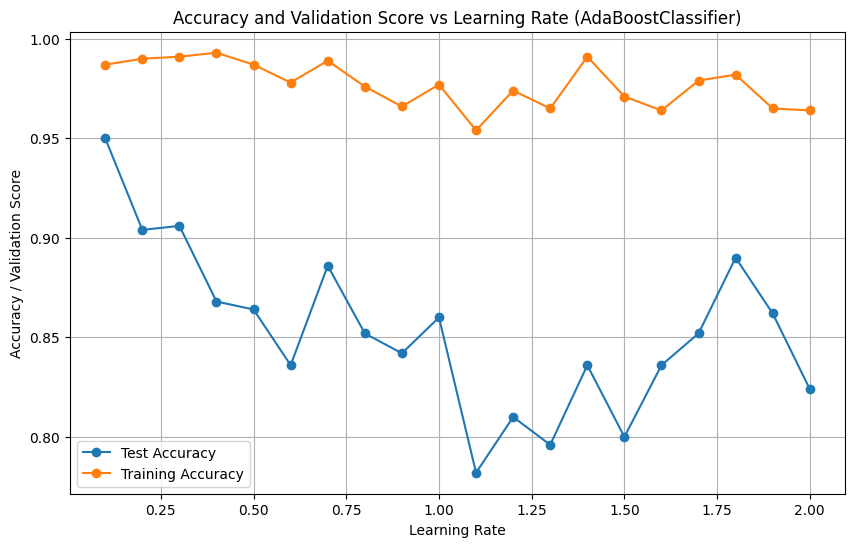

Learning Rate: 2.0, Test Accuracy: 0.824, Training Accuracy: 0.964


In [1]:
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

BASE_DIR = Path.cwd()
data = np.load("../Hyperparameters/yaleExtB_data.npy")
target = np.load("../Hyperparameters/yaleExtB_target.npy")

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=1/3)

accuracies = []
validation_scores = []  # Storing validation scores
learning_rate_values = []

for learning_rate in np.arange(0.1, 2.1, 0.1):
    # Define and train AdaBoostClassifier with DecisionTreeClassifier as base estimator
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, max_features='log2'), 
                                 n_estimators=500, learning_rate=learning_rate, algorithm='SAMME.R')
    ada_clf.fit(x_train, y_train)
    # Calculate accuracy on test set
    accuracy = ada_clf.score(x_test, y_test)
    accuracies.append(accuracy)
    # Calculate validation score on training set
    validation_score = ada_clf.score(x_train, y_train)
    validation_scores.append(validation_score)
    learning_rate_values.append(learning_rate)

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, accuracies, marker='o', linestyle='-', label='Test Accuracy')
plt.plot(learning_rate_values, validation_scores, marker='o', linestyle='-', label='Training Accuracy')
plt.title('Accuracy and Validation Score vs Learning Rate (AdaBoostClassifier)')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy / Validation Score')
plt.legend()
plt.grid(True)
plt.show()

print(f"Learning Rate: {learning_rate}, Test Accuracy: {accuracy}, Training Accuracy: {validation_score}")
